### Importing necessary modules for data extraction

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Loaded the dataset as dataframe using pandas

In [110]:
telco = pd.read_csv('./dataset.csv')
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Checking the shape and missing values

In [112]:
telco.shape

(7043, 21)

In [113]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dropping the CustomerID
- CustomerID is a randomly generated string that has no conversion opportunity.
- Also this feature has no significance over any feature.

In [114]:
telco.drop('customerID', inplace=True,axis=1)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking the data type of the features of the dataset

In [115]:
telco.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Encoding Features
- The following features have a data type of object which cannot be used.
- We have encoded the feature values from object to a numerical value

In [116]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

telco['gender']         = enc.fit_transform(telco['gender'])
telco['Dependents']     = enc.fit_transform(telco['Dependents'])
telco['Partner']        = enc.fit_transform(telco['Partner'])
telco['PhoneService']   = enc.fit_transform(telco['PhoneService'])
telco['MultipleLines']  = enc.fit_transform(telco['MultipleLines'])
telco['InternetService'] = enc.fit_transform(telco['InternetService'])
telco['OnlineSecurity'] = enc.fit_transform(telco['OnlineSecurity'])
telco['OnlineBackup']   = enc.fit_transform(telco['OnlineBackup'])
telco['DeviceProtection'] = enc.fit_transform(telco['DeviceProtection'])
telco['TechSupport']    = enc.fit_transform(telco['TechSupport'])
telco['StreamingTV']    = enc.fit_transform(telco['StreamingTV'])
telco['StreamingMovies'] = enc.fit_transform(telco['StreamingMovies'])
telco['Contract']       = enc.fit_transform(telco['Contract'])
telco['PaperlessBilling'] = enc.fit_transform(telco['PaperlessBilling'])
telco['PaymentMethod']  = enc.fit_transform(telco['PaymentMethod'])
telco['Churn']          = enc.fit_transform(telco['Churn'])

telco.head()   ### SHowing the result of change
     

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Test Train Data Splitting

In [117]:

from sklearn.model_selection import train_test_split

x = telco.iloc[:, :-3]
y = telco.iloc[0:, -1]
print(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=58)

print(x_train.shape)
print(x_test.shape)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [118]:
print("per-feature minimum before scaling:\n {}".format(x_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(x_train.max(axis=0)))

per-feature minimum before scaling:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
dtype: int64
per-feature maximum before scaling:
 gender               1
SeniorCitizen        1
Partner              1
Dependents           1
tenure              72
PhoneService         1
MultipleLines        2
InternetService      2
OnlineSecurity       2
OnlineBackup         2
DeviceProtection     2
TechSupport          2
StreamingTV          2
StreamingMovies      2
Contract             2
PaperlessBilling     1
PaymentMethod        3
dtype: int64


## Scalling the retrieved features
- We will be using MinMaxScaler algorithm here

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = scaler.transform(x_train)
print("per-feature minimum after scaling:\n {}".format(
    x_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    x_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### KNN Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

print("Train set accuracy: {:.2f}".format(knn.score(x_train, y_train)))
print("Test set accuracy: {:.2f}".format(knn.score(x_test, y_test)))

knnTrain = knn.score(x_train, y_train)
knnTest  = knn.score(x_test, y_test)

Train set accuracy: 0.84
Test set accuracy: 0.76


### Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

DTTrain = tree.score(x_train, y_train)
DTTest  = tree.score(x_test, y_test)

Accuracy on training set: 0.981
Accuracy on test set: 0.721


### Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)

# Print the accuracy from the testing data.
print("Accuracy on test set: {}".format(clf.score(x_test, y_test)))
print("Accuracy on train set: {}".format(clf.score(x_train, y_train)))

LRTrain = clf.score(x_train, y_train)
LRTest  = clf.score(x_test, y_test)


Accuracy on test set: 0.7946048272598202
Accuracy on train set: 0.793711967545639


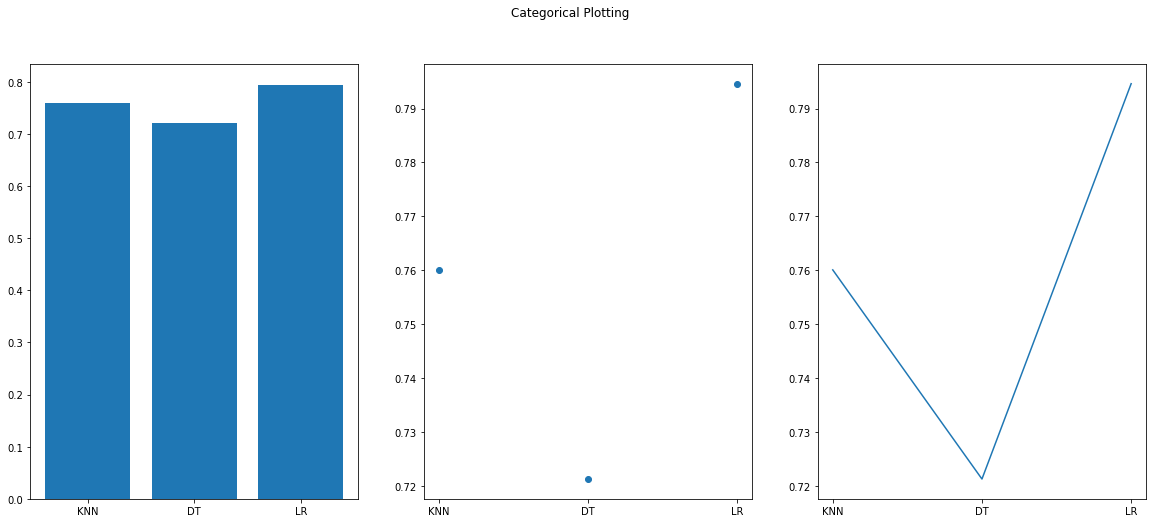

In [128]:
import matplotlib.pyplot as plt

names = ['KNN', 'DT', 'LR']
values = [knnTest, DTTest, LRTest]

plt.figure(figsize=(20, 8))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()
